Dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise)








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Ml _ GirlScript/Univariate_Linear_Regression_Assignment/airfoil_self_noise'

/content/drive/MyDrive/Colab Notebooks/Ml _ GirlScript/Univariate_Linear_Regression_Assignment/airfoil_self_noise


In [ ]:
ls

airfoil_self_noise.csv  description.txt


In [ ]:
import pandas as pd

data = pd.read_csv('airfoil_self_noise.csv', sep=',')

print(data.head(5))

   frequency  attack_angle  chord_length  velocity  disp_thickness    noise
0        800           0.0        0.3048      71.3        0.002663  126.201
1       1000           0.0        0.3048      71.3        0.002663  125.201
2       1250           0.0        0.3048      71.3        0.002663  125.951
3       1600           0.0        0.3048      71.3        0.002663  127.591
4       2000           0.0        0.3048      71.3        0.002663  127.461


In [ ]:
print(data.columns)

Index(['frequency', 'attack_angle', 'chord_length', 'velocity',
       'disp_thickness', 'noise'],
      dtype='object')


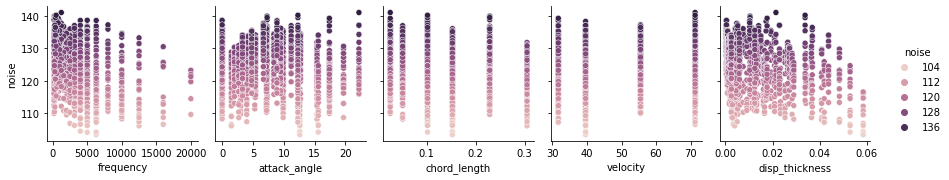

In [ ]:
import seaborn as sns

sns_colors = ['#ff9933', '#ff80ff']
sns.set_palette(sns_colors)

sns.pairplot(
    data,
    x_vars = ['frequency', 'attack_angle', 'chord_length', 'velocity', 'disp_thickness'],
    y_vars = 'noise',
    diag_kind = 'kde',
    hue = 'noise'
)

##Common code

In [ ]:
import tensorflow as tf
from tensorflow import keras

#creating the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [ ]:
#compiling model
model.compile(
              loss='mean_absolute_error',
              optimizer = 'adam',
              metrics = ['mae', 'mse'])

In [ ]:
#for plotting the behaviour of model during training
import matplotlib.pyplot as plt

def plotGraphs(subject):
    plt.plot(history.history[subject])
    plt.plot(history.history[f'val_{subject}'])
    plt.xlabel('Number of Epochs')
    plt.ylabel(subject)
    plt.legend([subject, f'val_{subject}'])
    plt.show()

In [ ]:
#plotting predictions vs actual labels

def predictionsPlot(labels, predictions):
    plt.scatter(labels, predictions)
    plt.xlabel('True Value / Labels')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0, plt.xlim()[1]])
    plt.ylim([0, plt.ylim()[1]])
    plt.show()

In [ ]:
#gausian distribution plot

def errorPlot(preds, labels, counts):
  errors = labels - preds
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

##Frequency vs Noise

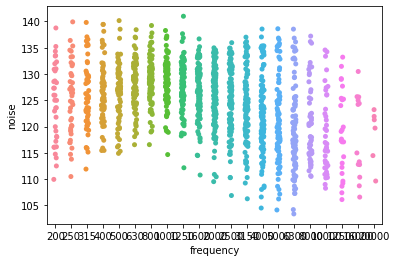

In [ ]:
sns.stripplot(x = 'frequency', y = 'noise', data = data, hue = None)

In [ ]:
univar_data = data[['frequency', 'noise']]
univar_data.head()

,frequency,noise
0,800,126.201
1,1000,125.201
2,1250,125.951
3,1600,127.591
4,2000,127.461


In [ ]:
trainData = univar_data.sample(frac = 0.8, random_state = 0)
testData = univar_data.drop(trainData.index)

trainFeatures = trainData.copy()
testFeatures = testData.copy()
trainLabels = trainFeatures.pop('noise')
testLabels = testFeatures.pop('noise')

In [ ]:
print(f'Train Data : \n{trainData.head()}')
print(f'Test Data : \n{testData.head()}')
print("====================================================")
print(f'Train Data Featues : \n{trainFeatures.head()}')
print(f'Test Data Features : \n{testFeatures.head()}')
print("====================================================")
print(f'Train Data Labels : \n{trainLabels.head()}')
print(f'Test Data Labels : \n{testLabels.head()}')

Train Data : 
      frequency    noise
968       10000  130.787
9          6300  119.541
1468       2500  110.317
1150        400  117.396
880        2500  127.625
Test Data : 
    frequency    noise
11      10000  115.391
23       4000  121.106
24       5000  119.606
25       6300  117.976
28      12500  111.076
Train Data Featues : 
      frequency
968       10000
9          6300
1468       2500
1150        400
880        2500
Test Data Features : 
    frequency
11      10000
23       4000
24       5000
25       6300
28      12500
Train Data Labels : 
968     130.787
9       119.541
1468    110.317
1150    117.396
880     127.625
Name: noise, dtype: float64
Test Data Labels : 
11    115.391
23    121.106
24    119.606
25    117.976
28    111.076
Name: noise, dtype: float64


In [ ]:
numOfEpochs = 4000

history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numOfEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 1501/4000
38/38 [==============================] - 0s 3ms/step - loss: 45.9151 - mae: 45.9151 - mse: 2671.3975 - val_loss: 44.6129 - val_mae: 44.6129 - val_mse: 2480.7368
Epoch 1502/4000
38/38 [==============================] - 0s 3ms/step - loss: 45.8265 - mae: 45.8265 - mse: 2628.8894 - val_loss: 46.0181 - val_mae: 46.0181 - val_mse: 2503.5701
Epoch 1503/4000
38/38 [==============================] - 0s 3ms/step - loss: 46.0765 - mae: 46.0765 - mse: 2643.8145 - val_loss: 44.5527 - val_mae: 44.5527 - val_mse: 2471.0657
Epoch 1504/4000
38/38 [==============================] - 0s 3ms/step - loss: 45.9016 - mae: 45.9016 - mse: 2709.8284 - val_loss: 44.5680 - val_mae: 44.5680 - val_mse: 2444.9351
Epoch 1505/4000
38/38 [==============================] - 0s 3ms/step - loss: 45.8832 - mae: 45.8832 - mse: 2624.3616 - val_loss: 44.7336 - val_mae: 44.7336 - val_mse: 2547.3582
Epoch 1506/4000
38/38 [==============================] - 0s 3ms/

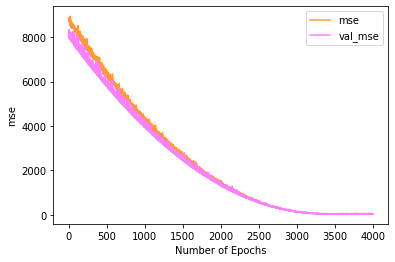

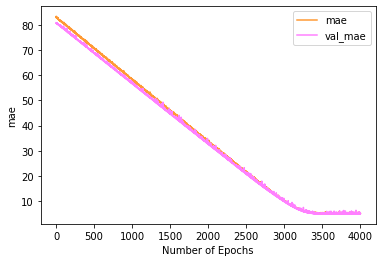

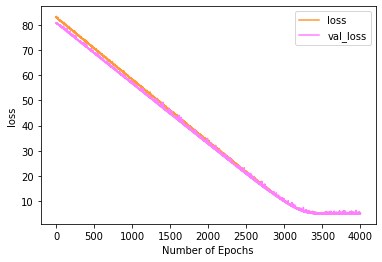

In [ ]:
plotGraphs('mse')
plotGraphs('mae')
plotGraphs('loss')

In [ ]:
print(f'''
Test Features List : {testFeatures.head(10)}

Predicted Values : {model.predict(testFeatures.head(10))}

Predicted Values (Flatenned Values) : {model.predict(testFeatures.head(10)).flatten()}
''')


Test Features List :     frequency
11      10000
23       4000
24       5000
25       6300
28      12500
32        400
33        500
36       1000
41       3150
43       5000

Predicted Values : [[113.42381 ]
 [122.23354 ]
 [120.76525 ]
 [118.856476]
 [109.7531  ]
 [127.51937 ]
 [127.37254 ]
 [126.638405]
 [123.48158 ]
 [120.76525 ]]

Predicted Values (Flatenned Values) : [113.42381  122.23354  120.76525  118.856476 109.7531   127.51937
 127.37254  126.638405 123.48158  120.76525 ]



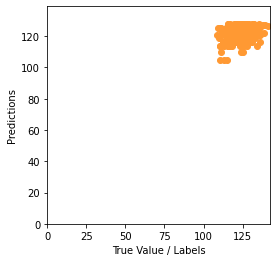

In [ ]:
predictionsPlot(testLabels, model.predict(testFeatures))

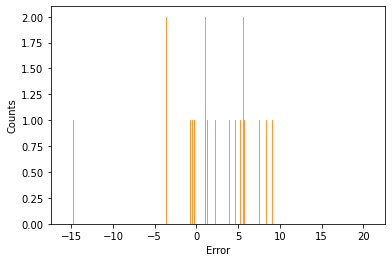

In [ ]:
errorPlot(model.predict(testFeatures).flatten(), testLabels, numOfEpochs)

##Velocity vs Noise

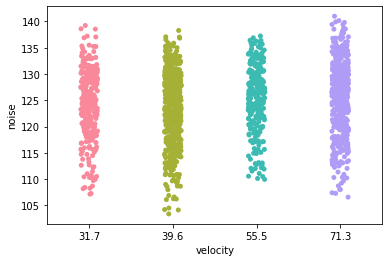

In [ ]:
sns.stripplot(x = 'velocity', y = 'noise', data = data, hue = None)

In [ ]:
univar_data = data[['velocity', 'noise']]
univar_data.head()

,velocity,noise
0,71.3,126.201
1,71.3,125.201
2,71.3,125.951
3,71.3,127.591
4,71.3,127.461


In [ ]:
trainData = univar_data.sample(frac = 0.8, random_state = 0)
testData = univar_data.drop(trainData.index)

trainFeatures = trainData.copy()
testFeatures = testData.copy()
trainLabels = trainFeatures.pop('noise')
testLabels = testFeatures.pop('noise')

In [ ]:
print(f'Train Data : \n{trainData.head()}')
print(f'Test Data : \n{testData.head()}')
print("====================================================")
print(f'Train Data Featues : \n{trainFeatures.head()}')
print(f'Test Data Features : \n{testFeatures.head()}')
print("====================================================")
print(f'Train Data Labels : \n{trainLabels.head()}')
print(f'Test Data Labels : \n{testLabels.head()}')

Train Data : 
      velocity    noise
968       71.3  130.787
9         71.3  119.541
1468      31.7  110.317
1150      71.3  117.396
880       71.3  127.625
Test Data : 
    velocity    noise
11      71.3  115.391
23      55.5  121.106
24      55.5  119.606
25      55.5  117.976
28      55.5  111.076
Train Data Featues : 
      velocity
968       71.3
9         71.3
1468      31.7
1150      71.3
880       71.3
Test Data Features : 
    velocity
11      71.3
23      55.5
24      55.5
25      55.5
28      55.5
Train Data Labels : 
968     130.787
9       119.541
1468    110.317
1150    117.396
880     127.625
Name: noise, dtype: float64
Test Data Labels : 
11    115.391
23    121.106
24    119.606
25    117.976
28    111.076
Name: noise, dtype: float64


In [ ]:
numOfEpochs = 3000

history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numOfEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
38/38 [==============================] - 0s 2ms/step - loss: 9.5046 - mae: 9.5046 - mse: 131.3715 - val_loss: 9.4686 - val_mae: 9.4686 - val_mse: 131.6986
Epoch 502/3000
38/38 [==============================] - 0s 3ms/step - loss: 9.5009 - mae: 9.5009 - mse: 131.3086 - val_loss: 9.4641 - val_mae: 9.4641 - val_mse: 131.5141
Epoch 503/3000
38/38 [==============================] - 0s 2ms/step - loss: 9.4939 - mae: 9.4939 - mse: 131.2607 - val_loss: 9.4535 - val_mae: 9.4535 - val_mse: 131.4362
Epoch 504/3000
38/38 [==============================] - 0s 2ms/step - loss: 9.4860 - mae: 9.4860 - mse: 130.9232 - val_loss: 9.4507 - val_mae: 9.4507 - val_mse: 131.2049
Epoch 505/3000
38/38 [==============================] - 0s 3ms/step - loss: 9.4796 - mae: 9.4796 - mse: 130.8633 - val_loss: 9.4406 - val_mae: 9.4406 - val_mse: 131.1396
Epoch 506/3000
38/38 [==============================] - 0s 2ms/step - loss: 9.4738 - mae: 9.4738 - 

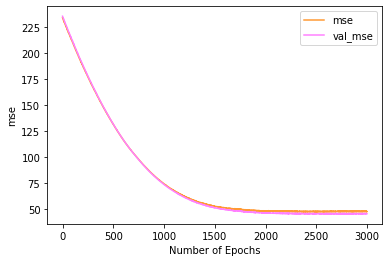

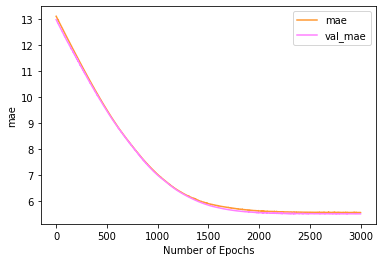

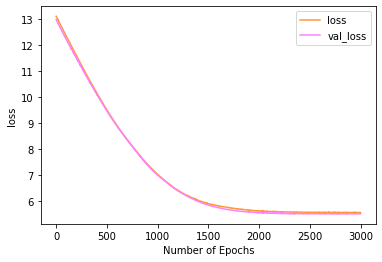

In [ ]:
plotGraphs('mse')
plotGraphs('mae')
plotGraphs('loss')

In [ ]:
print(f'''
Test Features List : {testFeatures.head(10)}

Predicted Values : {model.predict(testFeatures.head(10))}

Predicted Values (Flatenned Values) : {model.predict(testFeatures.head(10)).flatten()}
''')


Test Features List :     velocity
11      71.3
23      55.5
24      55.5
25      55.5
28      55.5
32      39.6
33      39.6
36      39.6
41      39.6
43      39.6

Predicted Values : [[127.00799]
 [125.97051]
 [125.97051]
 [125.97051]
 [125.97051]
 [124.92647]
 [124.92647]
 [124.92647]
 [124.92647]
 [124.92647]]

Predicted Values (Flatenned Values) : [127.00799 125.97051 125.97051 125.97051 125.97051 124.92647 124.92647
 124.92647 124.92647 124.92647]



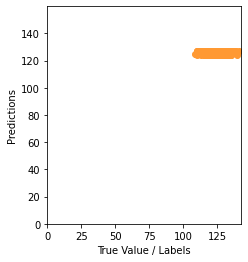

In [ ]:
predictionsPlot(testLabels, model.predict(testFeatures))

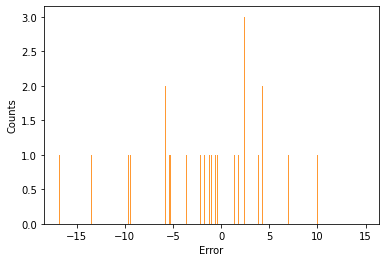

In [ ]:
errorPlot(model.predict(testFeatures).flatten(), testLabels, numOfEpochs)

##Chord-Length vs Noise

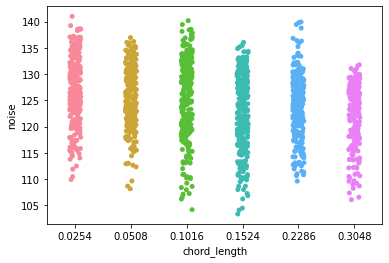

In [ ]:
sns.stripplot(x = 'chord_length', y = 'noise', data = data, hue = None)

In [ ]:
univar_data = data[['chord_length', 'noise']]
univar_data.head()

,chord_length,noise
0,0.3048,126.201
1,0.3048,125.201
2,0.3048,125.951
3,0.3048,127.591
4,0.3048,127.461


In [ ]:
trainData = univar_data.sample(frac = 0.8, random_state = 0)
testData = univar_data.drop(trainData.index)

trainFeatures = trainData.copy()
testFeatures = testData.copy()
trainLabels = trainFeatures.pop('noise')
testLabels = testFeatures.pop('noise')

In [ ]:
print(f'Train Data : \n{trainData.head()}')
print(f'Test Data : \n{testData.head()}')
print("====================================================")
print(f'Train Data Featues : \n{trainFeatures.head()}')
print(f'Test Data Features : \n{testFeatures.head()}')
print("====================================================")
print(f'Train Data Labels : \n{trainLabels.head()}')
print(f'Test Data Labels : \n{testLabels.head()}')

Train Data : 
      chord_length    noise
968         0.0254  130.787
9           0.3048  119.541
1468        0.1016  110.317
1150        0.0254  117.396
880         0.0508  127.625
Test Data : 
    chord_length    noise
11        0.3048  115.391
23        0.3048  121.106
24        0.3048  119.606
25        0.3048  117.976
28        0.3048  111.076
Train Data Featues : 
      chord_length
968         0.0254
9           0.3048
1468        0.1016
1150        0.0254
880         0.0508
Test Data Features : 
    chord_length
11        0.3048
23        0.3048
24        0.3048
25        0.3048
28        0.3048
Train Data Labels : 
968     130.787
9       119.541
1468    110.317
1150    117.396
880     127.625
Name: noise, dtype: float64
Test Data Labels : 
11    115.391
23    121.106
24    119.606
25    117.976
28    111.076
Name: noise, dtype: float64


In [ ]:
numOfEpochs = 500

history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numOfEpochs)

Epoch 1/500
38/38 [==============================] - 0s 2ms/step - loss: 5.5207 - mae: 5.5207 - mse: 46.8926 - val_loss: 5.3764 - val_mae: 5.3764 - val_mse: 43.5480
Epoch 2/500
38/38 [==============================] - 0s 1ms/step - loss: 5.5207 - mae: 5.5207 - mse: 46.8908 - val_loss: 5.3762 - val_mae: 5.3762 - val_mse: 43.5395
Epoch 3/500
38/38 [==============================] - 0s 2ms/step - loss: 5.5207 - mae: 5.5207 - mse: 46.8834 - val_loss: 5.3761 - val_mae: 5.3761 - val_mse: 43.5386
Epoch 4/500
38/38 [==============================] - 0s 2ms/step - loss: 5.5206 - mae: 5.5206 - mse: 46.8859 - val_loss: 5.3761 - val_mae: 5.3761 - val_mse: 43.5371
Epoch 5/500
38/38 [==============================] - 0s 2ms/step - loss: 5.5207 - mae: 5.5207 - mse: 46.8862 - val_loss: 5.3761 - val_mae: 5.3761 - val_mse: 43.5410
Epoch 6/500
38/38 [==============================] - 0s 2ms/step - loss: 5.5206 - mae: 5.5206 - mse: 46.8908 - val_loss: 5.3761 - val_mae: 5.3761 - val_mse: 43.5403
Epoch 7/50

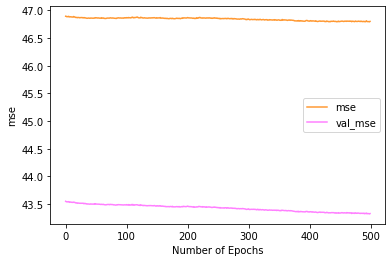

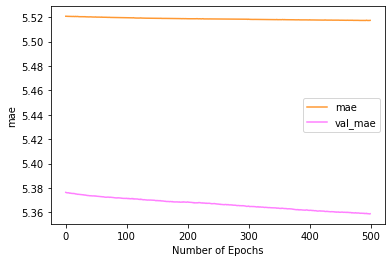

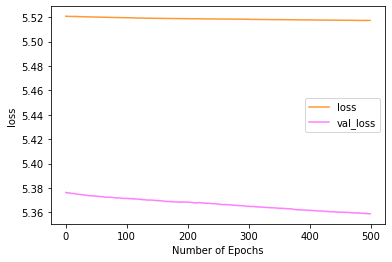

In [ ]:
plotGraphs('mse')
plotGraphs('mae')
plotGraphs('loss')

In [ ]:
print(f'''

Test Features List : {testFeatures.head(10)}

Predicted Values : {model.predict(testFeatures.head(10))}

Predicted Values (Flattened Values) : {model.predict(testFeatures.head(10)).flatten()}
''')



Test Features List :     chord_length
11        0.3048
23        0.3048
24        0.3048
25        0.3048
28        0.3048
32        0.3048
33        0.3048
36        0.3048
41        0.3048
43        0.3048

Predicted Values : [[123.87977]
 [123.87977]
 [123.87977]
 [123.87977]
 [123.87977]
 [123.87977]
 [123.87977]
 [123.87977]
 [123.87977]
 [123.87977]]

Predicted Values (Flattened Values) : [123.87977 123.87977 123.87977 123.87977 123.87977 123.87977 123.87977
 123.87977 123.87977 123.87977]



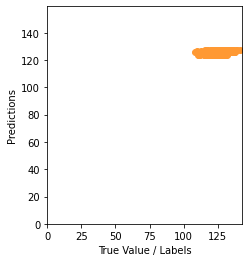

In [ ]:
predictionsPlot(testLabels, model.predict(testFeatures))

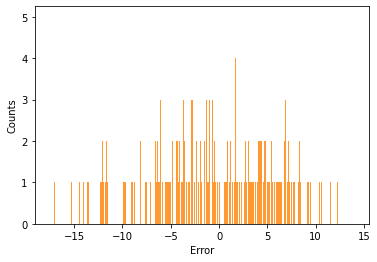

In [ ]:
errorPlot(model.predict(testFeatures).flatten(), testLabels, numOfEpochs)